# DSI Summer Workshops Series


Peggy Lindner<br>
Center for Advanced Computing & Data Science (CACDS)<br>
Data Science Institute (DSI)<br>
University of Houston  
plindner@uh.edu 


This Notebook is available at:
http://bitly.com/UHDSInotebook1

You can already download it! Use the "Save Link as" method.

Please make sure you have a copy of R up and running, as well as a Python 3 installation (ideally from Anacodna).

## Goals for today

Understand basics of text analysis using R

(well enough so that you can Google your problems, find the answer, and implement it.)

#### More specifically

1. Up and running with R & IPython
2. Understand a basic exploratory data analysis workflow
3. Basics of R and Topic Modeling 

#### Why R and not Python 

It's good for data exploration! 

## Part 1: Getting yourself ready

### First: Install software on your computer

* R [CRAN](https://www.anaconda.com/download/)
* Python[Anaconda](https://www.anaconda.com/download/)




### Second: Prep your R environment
On a Mac open a terminal and start R

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/on-a-mac.png)

On Windows: Open the Anaconda Command line and start R

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/anaconda-start.png)

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/windows.png)

Now let's install some packages ...

```
> install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
> devtools::install_github('IRkernel/IRkernel')
```

When you see "Please select a CRAN mirror" , well select one.

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/cran-repo.png)

... one last step - installing the Kernel

```
> IRkernel::installspec()
```

Now we can close the R environment (but leave your terminal and console open)


```
> quit()
```

Say "N" (no) when asked to save the workspace.

### Jupyter Notebooks is what we will be going to use

We are now ready to start up our Jupyter Environment from the terminal or the console:

```
$ jupyter notebook --notebook-dir C:/Users/[your username]

or on a Mac

$ jupyter notebook --notebook-dir /Users/[your username]
```

And your browser should open at the address: http://localhost:8888/tree

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/jupyter.png)

#### Open the downloaded notebook on your computer

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/second-screen.png)


#### Quick intro to Jupyter notebooks

Cells can be Markdown (like this one) or code


#### To start off with

Make sure you hit `Shift-Enter` or `Ctrl-Enter` when you are done.

In [ ]:
2 + 2

### Part 2: The Exploratory Analysis Workflow

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/data-science-workflow.png)
Image source: Hadley Wickham, R for Data Science

#### Our Example 

Media Analysis of a bunch of articles downloaded from a database called "Factiva"

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/factiva.png)


Make sure you download the data source file: http://bit.ly/UHDSIdata1 and store it in the Jupyter notebook directory (next to the *.ipynb file)

#### Frequently used R Packages in conjunction with text data

* [readr](https://cran.r-project.org/web/packages/readr/readr.pdf) Import data

Data Analysis of text based material

* [stringr](https://cran.r-project.org/web/packages/stringr/vignettes/stringr.html) Clean up text
* [SnowballC](https://cran.r-project.org/web/packages/SnowballC/SnowballC.pdf)  Stemming of words
* [tm](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) Text mining
* [Quanteda](https://quanteda.io/) veratile text analysis tool
* [topicmodels](https://www.tidytextmining.com/topicmodeling.html) Topic Modeling

Visualization

* [ggplot2](http://ggplot2.tidyverse.org/) Modern R visulaizations
* [wordcloud](http://developer.marvel.com) Make some nice word clouds
* [RColorBrewer](https://dataset.readthedocs.org/en/latest/) Get color into your visualizations



In [ ]:
#load all required libraries
library(readr)
library(stringr)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(tm)
library(ggplot2)
library(topicmodels)

#### Data Import

In [ ]:
# put the name of your csv file
inputfile <- "AJA_Factiva.txt"
# read the data
alldata <- read_file(inputfile)
# look at the dat
# what type is our data?
str(alldata)

#### Prepare data

In [ ]:
# data wrangling - split the file in different articles 
split.word <- "Document AJAZEN(.*)" 

# split up into individual documents
list_alldata_splitted <- str_split(alldata, split.word)
# convert to vector and remove last element (which is a leftover)
alldata_splitted <- unlist(list_alldata_splitted)
alldata_splitted <- alldata_splitted[-length(alldata_splitted)]
str(alldata_splitted)

In [ ]:
### create corpus 
article.corpus <- Corpus(VectorSource((alldata_splitted)))

article.corpus

In [ ]:
#inspect a particular document
writeLines(as.character(article.corpus[[30]]))

In [ ]:
#Check details (look at bunched up corpus to find anomalies)
inspect(article.corpus)

#### Data cleaning

In [ ]:
#create the toSpace content transformer 
toSpace <- content_transformer(function(x, pattern) { return (gsub(pattern, " ", x))})
#to remove potentially problematic symbols
article.corpus <- tm_map(article.corpus, toSpace, "-")
article.corpus <- tm_map(article.corpus, toSpace, ":")
article.corpus <- tm_map(article.corpus, toSpace, "'")
article.corpus <- tm_map(article.corpus, toSpace, "'")
article.corpus <- tm_map(article.corpus, toSpace, " -")

#Good practice to check after each step.
writeLines(as.character(article.corpus[[30]]))

In [ ]:
#Remove punctuation - replace punctuation marks with " "
article.corpus <- tm_map(article.corpus, removePunctuation)

#Good practice to check after each step.
writeLines(as.character(article.corpus[[30]]))

In [ ]:
#Transform to lower case
article.corpus <- tm_map(article.corpus,content_transformer(tolower))

#Strip digits
article.corpus <- tm_map(article.corpus, removeNumbers)

#Remove stopwords from standard stopword list 
article.corpus <- tm_map(article.corpus, removeWords, stopwords("english"))

#inspect output
writeLines(as.character(article.corpus[[30]]))

[Stopwords](https://github.com/arc12/Text-Mining-Weak-Signals/wiki/Standard-set-of-english-stopwords)

In [ ]:
#define and eliminate all custom stopwords
myStopwords <- c("monday")
article.corpus <- tm_map(article.corpus, removeWords, myStopwords)

#Strip whitespace (cosmetic?)
article.corpus <- tm_map(article.corpus, stripWhitespace)

#inspect output
writeLines(as.character(article.corpus[[30]]))

[Word Stemming](http://www.omegahat.net/Rstem/stemming.pdf)

In [ ]:
#Stem document
article.corpus <- tm_map(article.corpus,stemDocument)

#inspect output
writeLines(as.character(article.corpus[[30]]))

#### Prepare for Analysis - create word counts

In [ ]:
#Create document-term matrix
dtm <- DocumentTermMatrix(article.corpus)

dtm

In [ ]:
#inspect segment of document term matrix
inspect(dtm[15:16,100:105])

In [ ]:
#collapse matrix by summing over columns - this gets total counts (over all docs) for each term
freq <- colSums(as.matrix(dtm))
#length should be total number of terms
length(freq)

In [ ]:
#create sort order (descending)
ord <- order(freq,decreasing=TRUE)
#inspect most frequently occurring terms
freq[head(ord)]
#inspect least frequently occurring terms
freq[tail(ord)]

#List all terms in decreasing order of freq and write to disk
write.csv(freq[ord],"word_freq.csv")

In [ ]:
#alterantive: remove very frequent and very rare words
dtmr <-DocumentTermMatrix(article.corpus, control=list(wordLengths=c(4, 20),
                                  bounds = list(global = c(3,27))))

dtmr

freqr <- colSums(as.matrix(dtmr))
#length should be total number of terms
length(freqr)

#create sort order (desc)
ordr <- order(freqr,decreasing=TRUE)
#inspect most frequently occurring terms
freqr[head(ordr)]
#inspect least frequently occurring terms
freqr[tail(ordr)]

In [ ]:
#list most frequent terms. Lower bound specified as second argument
findFreqTerms(dtmr,lowfreq=60)

Now that we have the most frequently occurring terms in hand, we can check for correlations between some of these and other terms that occur in the corpus.  In this context, correlation is a quantitative measure of the co-occurrence of words in multiple documents.

In [ ]:
#correlations
findAssocs(dtmr,"turkish",0.5)
findAssocs(dtm,"children",0.5)

One needs to specify the DTM, the term of interest and the correlation limit. The latter is a number between 0 and 1 that serves as a lower bound for  the strength of correlation between the  search and result terms. For example, if the correlation limit is 1, findAssocs() will return only  those words that always co-occur with the search term. A correlation limit of 0.5 will return terms that have a search term co-occurrence of at least  50% and so on.

#### Visualizations

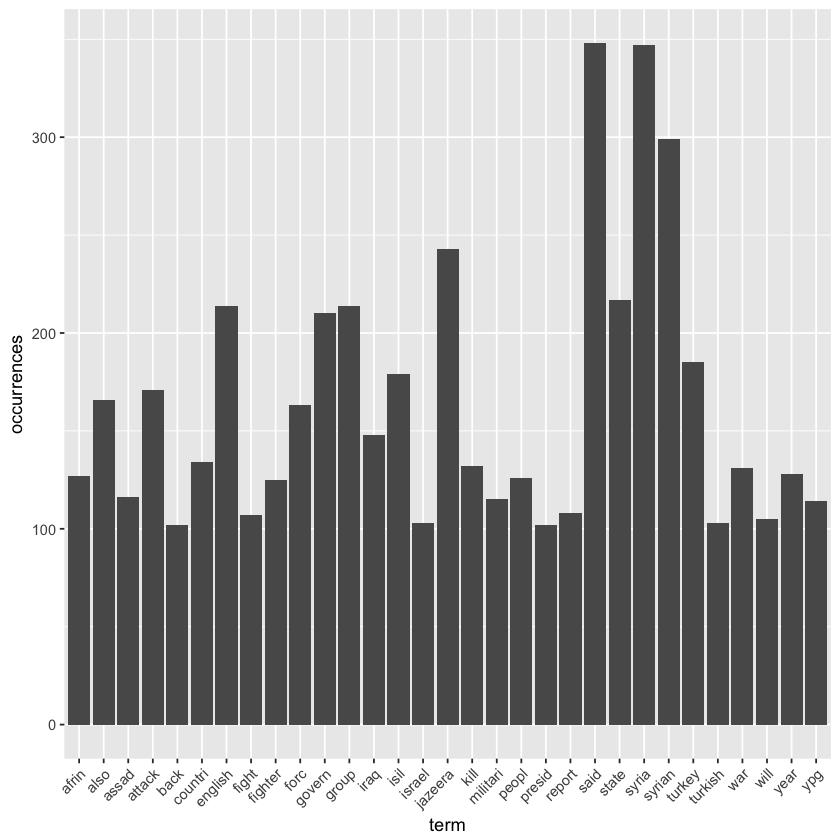

In [21]:
#Basic graphics
#histogram
wf=data.frame(term=names(freq),occurrences=freq)

p <- ggplot(subset(wf, freq>100), aes(term, occurrences))
p <- p + geom_bar(stat="identity")
p <- p + theme(axis.text.x=element_text(angle=45, hjust=1))
p

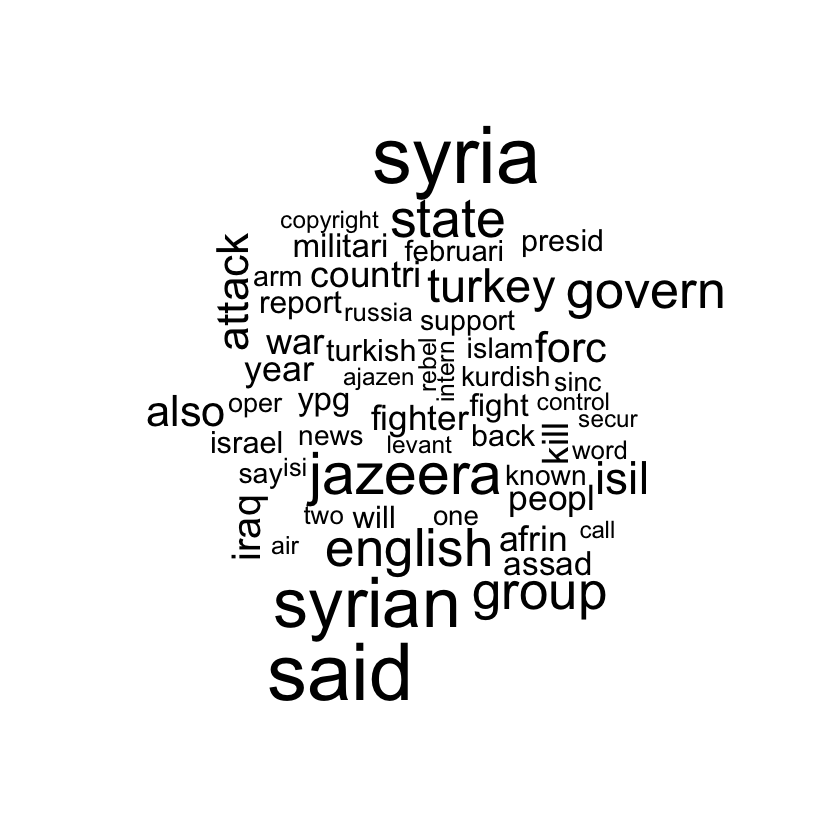

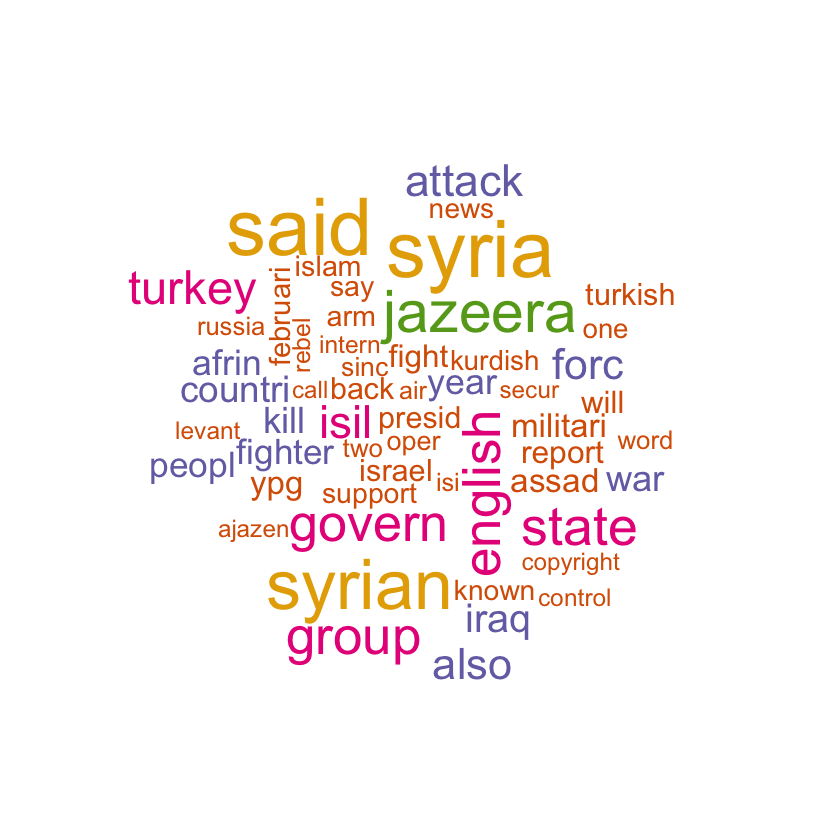

In [22]:
#wordcloud
#setting the same seed each time ensures consistent look across clouds
set.seed(42)
#limit words by specifying min frequency
wordcloud(names(freq),freq, min.freq=70)
#...add color
wordcloud(names(freq),freq,min.freq=70,colors=brewer.pal(6,"Dark2"))



![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/topicmodeling.png)

In [ ]:
#Topic modeling
#Set parameters for Gibbs sampling
burnin <- 4000
iter <- 2000
thin <- 500
seed <-list(2003,5,63,100001,765)
nstart <- 5
best <- TRUE


#Number of topics
k <- 5

#Run LDA using Gibbs sampling
ldaOut <-LDA(dtm,k, method="Gibbs", control=list(nstart=nstart, seed = seed, best=best, burnin = burnin, iter = iter, thin=thin))

#write out results
#docs to topics
ldaOut.topics <- as.matrix(topics(ldaOut))
write.csv(ldaOut.topics,file=paste("LDAGibbs",k,"DocsToTopics.csv"))

#top 6 terms in each topic
ldaOut.terms <- as.matrix(terms(ldaOut,6))
write.csv(ldaOut.terms,file=paste("LDAGibbs",k,"TopicsToTerms.csv"))

#probabilities associated with each topic assignment
topicProbabilities <- as.data.frame(ldaOut@gamma)
write.csv(topicProbabilities,file=paste("LDAGibbs",k,"TopicProbabilities.csv"))

#Find relative importance of top 2 topics
topic1ToTopic2 <- lapply(1:nrow(dtm),function(x)
  sort(topicProbabilities[x,])[k]/sort(topicProbabilities[x,])[k-1])

#Find relative importance of second and third most important topics
topic2ToTopic3 <- lapply(1:nrow(dtm),function(x)
  sort(topicProbabilities[x,])[k-1]/sort(topicProbabilities[x,])[k-2])

#write to file
write.csv(topic1ToTopic2,file=paste("LDAGibbs",k,"Topic1ToTopic2.csv"))
write.csv(topic2ToTopic3,file=paste("LDAGibbs",k,"Topic2ToTopic3.csv"))